In [54]:
#import library

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from torchvision.models import resnet18, ResNet18_Weights
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [55]:
#data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root='/kaggle/input/pets-cicak-dan-komodo/pets_cicak_komodo', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [56]:
#transfer learning ResNet
model = resnet18(weights=ResNet18_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = False  # Freeze layer awal
model.fc = torch.nn.Linear(model.fc.in_features, 2)  # Ubah output jadi 2 kelas

In [57]:
#training
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)


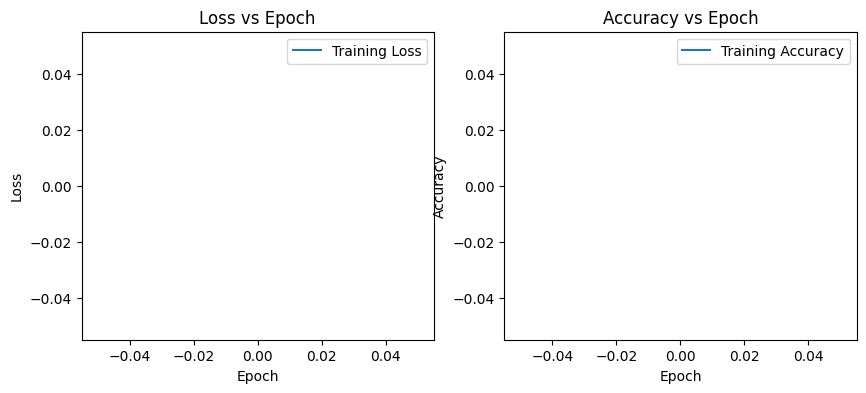

In [58]:
#Visualisasi akurasi & Loss selama training

import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []

# Plot loss dan akurasi
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

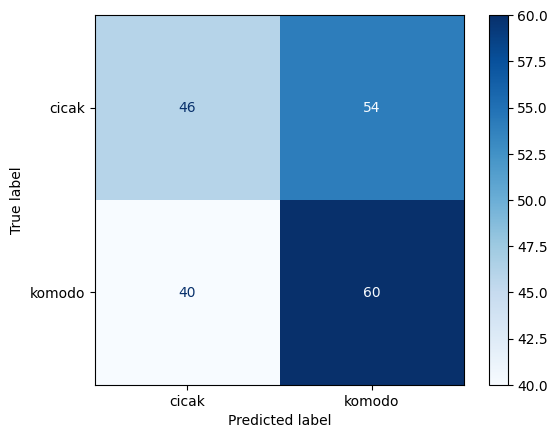

In [59]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Asumsikan kamu punya list y_true dan y_pred
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Tampilkan confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=dataset.classes))



              precision    recall  f1-score   support

       cicak       0.53      0.46      0.49       100
      komodo       0.53      0.60      0.56       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

